In [50]:
%%shell
jupyter nbconvert --to html /content/Challenge_2.ipynb

[NbConvertApp] WARNING | pattern '/content/Challenge_2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex

CalledProcessError: ignored

In [2]:
!git clone https://github.com/leap-stc/ClimSim.git

# Step 2: Navigate to the cloned repository directory
%cd ClimSim

# Step 3: Install the climsim_utils package
!pip install .

Cloning into 'ClimSim'...
remote: Enumerating objects: 4506, done.
remote: Counting objects: 100% (811/811), done.
remote: Compressing objects: 100% (357/357), done.
remote: Total 4506 (delta 461), reused 718 (delta 441), pack-reused 3695
Receiving objects: 100% (4506/4506), 140.16 MiB | 21.64 MiB/s, done.
Resolving deltas: 100% (1554/1554), done.
Updating files: 100% (2068/2068), done.
/content/ClimSim
Processing /content/ClimSim
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.7 MB/s eta 0:00:00
  Created wheel for climsim-utils: filename=climsim_utils-0.0.1-py3-none-any.whl size=14489 sha256=6397109b1e4541a21e5afc2ff0c07e1f5efc13955f85ee83c3e3e029caa79e08
  Stored in directory: /tmp/pip-ephem-wheel-cache-opyjzj5f/wheels/a2/10/6e/125ae0c7cf1c521a7afaa0ba206e930d032a286728ae1a9103
Successfully built climsim-utils


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Challenge 2

## Load training and validation data

In [4]:
!ls /content/ClimSim

ARCHITECTURE.md  climsim_utils		 demo_notebooks  grid_info	README.md  website
baseline_models  climsim_utils.egg-info  evaluation	 LICENSE	setup.py
build		 dataset_statistics	 figures	 preprocessing	tests


In [5]:
!pip install netCDF4

In [6]:
from climsim_utils.data_utils import *

In [7]:
grid_path = 'grid_info/ClimSim_low-res_grid-info.nc'
norm_path = 'preprocessing/normalizations/'

grid_info = xr.open_dataset(grid_path)
input_mean = xr.open_dataset(norm_path + 'inputs/input_mean.nc')
input_max = xr.open_dataset(norm_path + 'inputs/input_max.nc')
input_min = xr.open_dataset(norm_path + 'inputs/input_min.nc')
output_scale = xr.open_dataset(norm_path + 'outputs/output_scale.nc')

data = data_utils(grid_info = grid_info,
                  input_mean = input_mean,
                  input_max = input_max,
                  input_min = input_min,
                  output_scale = output_scale)

# set variables to V1 subset
data.set_to_v1_vars()

In [8]:
# Change this path to your own

train_input_path = '/content/drive/MyDrive/Project3_data/train_input.npy'
train_target_path = '/content/drive/MyDrive/Project3_data/train_target.npy'
val_input_path = '/content/drive/MyDrive/Project3_data/val_input.npy'
val_target_path = '/content/drive/MyDrive/Project3_data/val_target.npy'

# Section1: Inflated Zero Prediction

**Subsetting the data**

In [9]:
# sample at random
import numpy as np
np.random.seed(123)
rd_samp_list = np.random.random_integers(1,10091, size=3840)

<ipython-input-9-40c249d21939>:4: DeprecationWarning: This function is deprecated. Please call randint(1, 10091 + 1) instead
  rd_samp_list = np.random.random_integers(1,10091, size=3840)


In [10]:
data.input_train = data.load_npy_file(train_input_path)[rd_samp_list,:]
#np.save('train_input_sub3840.npy',data.input_train, allow_pickle=True)
np.shape(data.input_train)

(3840, 124)

In [11]:
data.target_train = data.load_npy_file(train_target_path)[rd_samp_list,:]
#np.save('train_target_sub3840.npy',data.target_train, allow_pickle=True)
np.shape(data.target_train)

(3840, 128)

In [12]:
data.target_val = data.load_npy_file(val_target_path)[rd_samp_list,:]
#np.save('val_target_sub3840.npy',data.target_val, allow_pickle=True)
np.shape(data.target_val)

(3840, 128)

In [13]:
data.input_val = data.load_npy_file(val_input_path)[rd_samp_list,:]
#np.save('val_input_sub3840.npy',data.input_val, allow_pickle=True)
np.shape(data.input_val)

(3840, 124)

<Axes: >

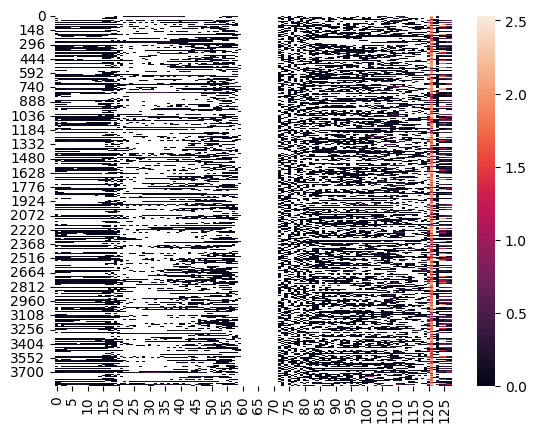

In [14]:
import pandas as pd
import seaborn as sns
tmp = pd.DataFrame(data.target_train)
tmp1 = pd.DataFrame(data.target_val)

sns.heatmap(tmp[tmp>0])
#print(tmp.isnull().count())

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.051015,-0.084005,-0.042217,-0.057004,-0.080328,-0.097813,-0.088183,-0.061342,-0.036200,-0.027788,...,-0.020347,0.055967,0.000000,1.927511,0.000000,0.528168,0.000000,0.000000,0.000000,0.000000
1,-0.023153,-0.072105,-0.008003,-0.057662,-0.091456,-0.118251,-0.108992,-0.079142,-0.051904,-0.043198,...,-0.179627,0.134845,0.000000,2.144170,0.000000,0.281287,0.000000,0.000000,0.000000,0.000000
2,-0.008441,-0.082944,-0.077815,-0.081853,-0.080663,-0.090192,-0.088474,-0.071323,-0.046802,-0.036006,...,-0.056697,-0.028289,0.000000,1.912760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.021756,-0.025124,-0.057871,-0.060814,-0.080787,-0.093583,-0.087148,-0.072393,-0.048403,-0.042938,...,-0.529970,-0.568937,0.000000,2.163975,0.000000,0.431322,0.000000,0.000000,0.000000,0.000000
4,-0.026421,-0.015312,-0.037429,-0.061920,-0.085901,-0.088910,-0.071975,-0.058426,-0.038670,-0.027367,...,0.071082,0.155986,0.000000,1.446719,0.171126,0.070021,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,-0.032833,-0.054343,-0.031515,-0.053479,-0.069867,-0.082050,-0.086163,-0.067919,-0.037138,-0.026178,...,0.006489,0.003885,0.000000,0.913436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3836,0.045105,0.010177,0.042656,0.068401,0.106592,0.144918,0.146330,0.101074,0.060989,0.045273,...,-0.513229,-0.528738,1.203780,1.883397,0.000000,0.000000,1.235841,1.251669,0.261401,0.034109
3837,0.035668,-0.005614,0.011586,0.016741,-0.021514,-0.049720,-0.030522,-0.012881,-0.007425,-0.004393,...,-0.216114,-0.438585,0.178954,1.765967,0.000000,0.000000,0.145986,0.176606,0.132514,0.064537
3838,0.001696,0.017408,0.054837,0.066068,0.082153,0.071875,0.036624,0.030599,0.027626,0.026804,...,0.029270,0.083263,0.387452,1.835962,0.000000,0.001437,0.278778,0.399912,0.213234,0.066757


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.023296,-0.058277,-0.031258,-0.050286,-0.079422,-0.100515,-0.085699,-0.062443,-0.037039,-0.028176,...,0.014791,0.044898,0.000000,1.524488,0.038152,0.010357,0.000000,0.000000,0.000000,0.000000
1,-0.008712,-0.089797,-0.028048,-0.050357,-0.079381,-0.112272,-0.104238,-0.072195,-0.044896,-0.037627,...,-0.209983,-0.198782,0.000000,2.092642,0.000000,0.000230,0.000000,0.000000,0.000000,0.000000
2,-0.018586,-0.068725,-0.067915,-0.056130,-0.079048,-0.093658,-0.086002,-0.068467,-0.047270,-0.033698,...,-0.072282,-0.119056,0.000000,1.901727,0.000000,0.000015,0.000000,0.000000,0.000000,0.000000
3,-0.011075,-0.046205,-0.040996,-0.052552,-0.076145,-0.094075,-0.089584,-0.071602,-0.044874,-0.036718,...,-0.219118,-0.210068,0.000000,2.138001,0.000000,0.044560,0.000000,0.000000,0.000000,0.000000
4,-0.012865,-0.077751,-0.070872,-0.077490,-0.085055,-0.077574,-0.056502,-0.044125,-0.030627,-0.027505,...,0.003597,0.017814,0.000000,1.818836,0.000000,0.004222,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,-0.019754,-0.038980,-0.046954,-0.065374,-0.081546,-0.085978,-0.076484,-0.067705,-0.049165,-0.036612,...,-0.009290,0.047933,0.000000,0.918944,0.026914,0.002841,0.000000,0.000000,0.000000,0.000000
3836,0.042306,0.000459,0.057629,0.084987,0.121784,0.137812,0.122895,0.091741,0.066759,0.051960,...,-0.037823,-0.053487,1.200122,1.931175,0.000000,0.000000,1.236107,1.244393,0.260723,0.033767
3837,0.027609,0.007749,0.024069,0.029575,-0.004058,-0.053315,-0.051894,-0.023901,-0.004051,0.000246,...,-0.151208,-0.313870,0.123703,1.990671,0.000000,0.000000,0.067886,0.061295,0.133767,0.120478
3838,0.036195,0.006659,0.026956,0.067370,0.082849,0.071678,0.044174,0.041055,0.029436,0.021991,...,0.032980,0.106121,0.421955,1.731724,0.000000,0.275539,0.335976,0.443902,0.205245,0.043050


<Axes: xlabel='123', ylabel='Count'>

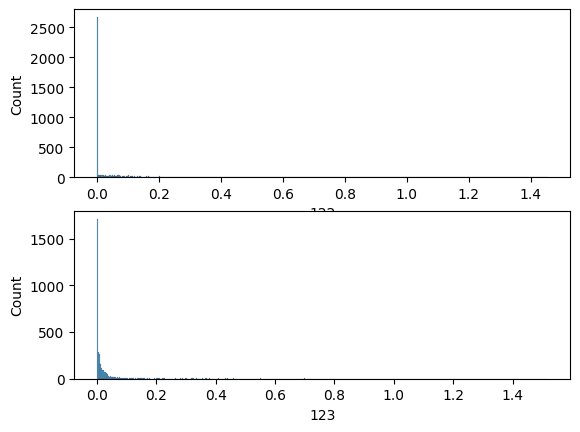

In [15]:
fig, ax = plt.subplots(2,1)
sns.histplot(tmp.loc[:,122], label = 'precipitation1', ax=ax[0])
sns.histplot(tmp.loc[:,123], label= 'precipitation2',ax=ax[1])

In [16]:
target_train_sub = tmp.loc[:,122:123]
target_val_sub=tmp1.loc[:,122:123]

target train column 122 : $y_{precipitation_1} = y_1$, target train column 123: $y_{precipitation_2} = y_2$

$X_{sub} \in \mathbb{R}^{3840 \times 124}$ = input_train


Model: $\mathbb{E}(y_1|X) = g(\beta^TX)$ -> g in Zero Inflated ZINB: negative binomial, log link.

In [19]:
tmp.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
123    0
124    0
125    0
126    0
127    0
Length: 128, dtype: int64

From here we start the ZI model

In [ ]:
# Calculating mean and variance for non-zero values of both columns
non_zero_snow = target_train_sub[target_train_sub[122] > 0][122]
non_zero_rain = target_train_sub[target_train_sub[123] > 0][123]

mean_snow = non_zero_snow.mean()
variance_snow = non_zero_snow.var()

mean_rain = non_zero_rain.mean()
variance_rain = non_zero_rain.var()

mean_snow, variance_snow, mean_rain, variance_rain

(0.123456776, 0.023631379, 0.051637717, 0.015058406)

Results : \ Snow Rate (Column 122): \ Mean: 0.1235 \ Variance: 0.0236 \

Rain Rate (Column 123): \ Mean: 0.0516 \ Variance: 0.0151 \

We can decide the ZI model among the two: \

Zero-Inflated Poisson (ZIP): Suitable if the non-zero data seems to follow a Poisson distribution. \
Zero-Inflated Negative Binomial (ZINB): Suitable if the non-zero data exhibits overdispersion (variance > mean). \
If the variance is significantly larger than the mean, it suggests overdispersion, making ZINB a better choice. Otherwise, ZIP might be more appropriate. \

Since for both columns, the variance is not significantly larger than the mean, the Zero-Inflated Poisson (ZIP) model might be a suitable choice.

**ZIP**

In [20]:
import statsmodels.api as sm
input_train_data = data.input_train
# Define the independent variable (constant) and dependent variable (snow rate)
X_train_snow = sm.add_constant(input_train_data)
y_train_snow = target_train_sub[122]

# Train the Zero-Inflated Poisson model
zip_model_snow = sm.ZeroInflatedPoisson(y_train_snow, X_train_snow).fit()

# Display the model summary
zip_model_snow.summary()


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 0.116659
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                     122   No. Observations:                 3840
Model:             ZeroInflatedPoisson   Df Residuals:                     3715
Method:                            MLE   Df Model:                          124
Date:                 Wed, 01 Nov 2023   Pseudo R-squ.:                  0.2618
Time:                         20:29:47   Log-Likelihood:                -447.97
converged:                       False   LL-Null:                       -606.84
Covariance Type:             nonrobust   LLR p-value:                 5.885e-19
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -15.3361     60.074     -0.255      0.799    -133.079     102.407
const            -4.1490      4.697     -0.883      0.377     -13.355       5.057
x1                0.0399     32.282      0.001      0.999     -63.232      63.311
x2                0.1630      8.173      0.020      0.984     -15.856      16.182
x3               -0.0642     11.645     -0.006      0.996     -22.888      22.760
x4               -0.1982     18.643     -0.011      0.992     -36.738      36.341
x5               -0.2672     25.749     -0.010      0.992     -50.733      50.199
x6               -0.5451     19.780     -0.028      0.978     -39.314      38.224
x7               -0.6711     27.598     -0.024      0.981     -54.762      53.419
x8               -0.7112     40.681     -0.017      0.986     -80.444      79.021
x9               -0.6979     56.847     -0.012      0.990    -112.115     110.719
x10              -0.7594     74.997     -0.010      0.992    -147.751     146.232
x11              -0.7173     85.950     -0.008      0.993    -169.176     167.742
x12              -0.6132     88.764     -0.007      0.994    -174.588     173.362
x13              -0.3948     88.153     -0.004      0.996    -173.172     172.383
x14              -0.1116     82.327     -0.001      0.999    -161.470     161.247
x15               0.2372     60.582      0.004      0.997    -118.502     118.976
x16               0.6044     39.765      0.015      0.988     -77.333      78.541
x17               0.8141     31.512      0.026      0.979     -60.947      62.576
x18               1.0318     16.866      0.061      0.951     -32.025      34.088
x19               1.0737     14.239      0.075      0.940     -26.834      28.982
x20               1.1276     15.748      0.072      0.943     -29.738      31.993
x21               0.8890     17.490      0.051      0.959     -33.391      35.169
x22               0.7058     22.924      0.031      0.975     -44.224      45.635
x23               0.4116     34.346      0.012      0.990     -66.906      67.729
x24               0.1800     52.123      0.003      0.997    -101.978     102.339
x25              -0.0281     74.129     -0.000      1.000    -145.317     145.261
x26              -0.1480    102.270     -0.001      0.999    -200.594     200.298
x27              -0.2153    132.181     -0.002      0.999    -259.285     258.854
x28              -0.2325    143.379     -0.002      0.999    -281.250     280.785
x29              -0.2245    170.673     -0.001      0.999    -334.737     334.288
x30              -0.1871    189.951     -0.001      0.999    -372.484     372.110
x31              -0.1322    194.453     -0.001      0.999    -381.254     380.990
x32              -0.0792    168.448     -0.000      1.000    -330.232     330.073
x33              -0.0247    136.218     -0.000      1.000    -267.008     266.958
x34               0.0225    168.827      0.000      1.000    -330.873     330.918
x35               0.0607    175.67

In [21]:
# Define the independent variable (constant) and dependent variable (rain rate)
X_train_rain = sm.add_constant(input_train_data)
y_train_rain = target_train_sub[123]

# Train the Zero-Inflated Poisson model
zip_model_rain = sm.ZeroInflatedPoisson(y_train_rain, X_train_rain).fit()

# Display the model summary
zip_model_rain.summary()

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 0.111291
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                     123   No. Observations:                 3840
Model:             ZeroInflatedPoisson   Df Residuals:                     3715
Method:                            MLE   Df Model:                          124
Date:                 Wed, 01 Nov 2023   Pseudo R-squ.:                  0.2580
Time:                         20:29:48   Log-Likelihood:                -427.36
converged:                       False   LL-Null:                       -575.92
Covariance Type:             nonrobust   LLR p-value:                 3.071e-16
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -19.3203    294.215     -0.066      0.948    -595.972     557.331
const            -4.2002      3.932     -1.068      0.285     -11.907       3.507
x1                0.0652     37.058      0.002      0.999     -72.566      72.697
x2                0.3562      7.307      0.049      0.961     -13.966      14.678
x3               -0.0538      7.265     -0.007      0.994     -14.293      14.186
x4               -0.2585     10.902     -0.024      0.981     -21.625      21.108
x5               -0.4450     16.244     -0.027      0.978     -32.283      31.393
x6               -0.7752     14.312     -0.054      0.957     -28.827      27.276
x7               -0.8452     17.795     -0.047      0.962     -35.723      34.032
x8               -0.8651     24.559     -0.035      0.972     -49.000      47.270
x9               -0.9208     32.783     -0.028      0.978     -65.174      63.332
x10              -1.1956     34.194     -0.035      0.972     -68.215      65.824
x11              -1.2333     29.132     -0.042      0.966     -58.331      55.864
x12              -0.9349     24.242     -0.039      0.969     -48.449      46.579
x13              -0.6574     27.270     -0.024      0.981     -54.106      52.791
x14              -0.4548     26.778     -0.017      0.986     -52.938      52.029
x15              -0.0513     18.267     -0.003      0.998     -35.854      35.752
x16               0.4936      9.176      0.054      0.957     -17.491      18.478
x17               1.2537      6.684      0.188      0.851     -11.847      14.354
x18               1.9792      5.459      0.363      0.717      -8.720      12.678
x19               1.6803      5.179      0.324      0.746      -8.471      11.832
x20               1.4460      6.677      0.217      0.829     -11.640      14.532
x21               1.3813     10.900      0.127      0.899     -19.982      22.745
x22               1.1022     17.282      0.064      0.949     -32.770      34.974
x23               0.7730     27.494      0.028      0.978     -53.113      54.659
x24               0.4272     40.588      0.011      0.992     -79.123      79.978
x25               0.0790     54.403      0.001      0.999    -106.548     106.706
x26              -0.1851     69.651     -0.003      0.998    -136.699     136.329
x27              -0.3636     90.541     -0.004      0.997    -177.820     177.093
x28              -0.4705    103.764     -0.005      0.996    -203.844     202.903
x29              -0.5187    119.796     -0.004      0.997    -235.315     234.278
x30              -0.4941    129.464     -0.004      0.997    -254.239     253.250
x31              -0.4173    135.864     -0.003      0.998    -266.706     265.872
x32              -0.3516    116.161     -0.003      0.998    -228.023     227.320
x33              -0.2752    110.800     -0.002      0.998    -217.440     216.889
x34              -0.2091    118.545     -0.002      0.999    -232.553     232.135
x35              -0.1521    117.81

In [22]:
# Make predictions using the trained ZIP models
X_test_snow = sm.add_constant(input_train_data)
X_test_rain = sm.add_constant(input_train_data)

predicted_snow = zip_model_snow.predict(X_test_snow)
predicted_rain = zip_model_rain.predict(X_test_rain)

# Calculate the Mean Absolute Error (MAE) for the predictions
mae_snow = (abs(predicted_snow - target_val_sub[122])).mean()
mae_rain = (abs(predicted_rain - target_val_sub[123])).mean()

mae_snow, mae_rain
print("MAE for Snow Rate: ", mae_snow)
print("MAE for Rain Rate: ", mae_rain)


MAE for Snow Rate:  0.03580687862011734
MAE for Rain Rate:  0.05440257581897902


**Mean Absolute Errors (MAE)** \\
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \\
$$
MAE represent the average absolute difference between the predicted and actual values in the testing dataset. Lower MAE values indicate better model performance.

**Result :** \\
According to the fact that MAE for Snow Rate is smaller, it can be concluded that the model for Snow is more accurate than Rain.

**Dimension Reduction (PCA)**

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
# Validation
input_val_data = data.input_val
# Define the independent variable (constant) and dependent variable (snow rate)
X_val_snow = sm.add_constant(input_val_data)
y_val_snow = target_val_sub[122]
X_val_rain = sm.add_constant(input_val_data)
y_val_rain = target_val_sub[123]

In [27]:
#Applying PCA for Dimension Reduction for Rain
pca = PCA(n_components=3)  # Select the number of principal components to retain
exog_pca = pca.fit_transform(X_train_rain)

#Refit the Zero-Inflated Poisson model
exog_pca = sm.add_constant(exog_pca)
model = sm.ZeroInflatedPoisson(endog=y_train_rain, exog=exog_pca, inflation='logit')
results = model.fit()

#Print model summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.121826
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                     123   No. Observations:                 3840
Model:             ZeroInflatedPoisson   Df Residuals:                     3836
Method:                            MLE   Df Model:                            3
Date:                 Wed, 01 Nov 2023   Pseudo R-squ.:                  0.1877
Time:                         20:29:49   Log-Likelihood:                -467.81
converged:                        True   LL-Null:                       -575.92
Covariance Type:             nonrobust   LLR p-value:                 1.320e-46
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -15.6454

The converged will be true for model of rain rate until we set the number of components to be 3.

In [28]:
#Applying PCA for Dimension Reduction for Snow
pca = PCA(n_components=1)  # Select the number of principal components to retain
exog_pca = pca.fit_transform(X_train_snow)

#Refit the Zero-Inflated Poisson model
exog_pca = sm.add_constant(exog_pca)
model = sm.ZeroInflatedPoisson(endog=y_train_snow, exog=exog_pca, inflation='logit')
results = model.fit()

#Print model summary
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.128455
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                     122   No. Observations:                 3840
Model:             ZeroInflatedPoisson   Df Residuals:                     3838
Method:                            MLE   Df Model:                            1
Date:                 Wed, 01 Nov 2023   Pseudo R-squ.:                  0.1872
Time:                         20:29:50   Log-Likelihood:                -493.27
converged:                        True   LL-Null:                       -606.84
Covariance Type:             nonrobust   LLR p-value:                 2.504e-51
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -21.4349

The converged will be true for model of snow rate until we set the number of components to be 1

**Applying PCA for validation data**

In [44]:
#Applying PCA for Dimension Reduction for Snow
pca = PCA(n_components=1)  # Select the number of principal components to retain
exog_pca = pca.fit_transform(X_val_snow)

#Refit the Zero-Inflated Poisson model
exog_pca = sm.add_constant(exog_pca)
model = sm.ZeroInflatedPoisson(endog=y_val_snow, exog=exog_pca, inflation='logit')
results_pca_snow = model.fit()

#Print model summary
print(results_pca_snow.summary())

Optimization terminated successfully.
         Current function value: 0.117904
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                     122   No. Observations:                 3840
Model:             ZeroInflatedPoisson   Df Residuals:                     3838
Method:                            MLE   Df Model:                            1
Date:                 Wed, 01 Nov 2023   Pseudo R-squ.:                  0.1765
Time:                         20:58:09   Log-Likelihood:                -452.75
converged:                        True   LL-Null:                       -549.80
Covariance Type:             nonrobust   LLR p-value:                 4.071e-44
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -16.5236

The converged will be true for model of snow rate until we set the number of components to be 1

In [45]:
#Applying PCA for Dimension Reduction for Rain
pca = PCA(n_components=3)  # Select the number of principal components to retain
exog_pca = pca.fit_transform(X_val_rain)

#Refit the Zero-Inflated Poisson model
exog_pca = sm.add_constant(exog_pca)
model = sm.ZeroInflatedPoisson(endog=y_train_rain, exog=exog_pca, inflation='logit')
results_pca_rain = model.fit()

#Print model summary
print(results_pca_rain.summary())

         Current function value: 0.143702
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                     123   No. Observations:                 3840
Model:             ZeroInflatedPoisson   Df Residuals:                     3836
Method:                            MLE   Df Model:                            3
Date:                 Wed, 01 Nov 2023   Pseudo R-squ.:                 0.04185
Time:                         20:58:11   Log-Likelihood:                -551.81
converged:                       False   LL-Null:                       -575.92
Covariance Type:             nonrobust   LLR p-value:                 1.923e-10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const   -11.6884      6.506     -1.796      0.072     

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The converged will be true for model of rain rate until we set the number of components to be 3.

**Evaluation**

In [46]:
from scipy.stats import poisson

In [47]:
# For Rain rate
predicted_counts_baseline = zip_model_rain.predict(X_val_rain)
baseline_deviance = -2 * np.sum(poisson.logpmf(y_val_rain, predicted_counts_baseline))
baseline_aic = zip_model_rain.aic
baseline_bic = zip_model_rain.bic

X_val_pca = pca.transform(X_val_rain)
X_val_pca = sm.add_constant(X_val_pca)
predicted_counts_pca = results_pca_rain.predict(X_val_pca)

# Compute evaluation metrics on the validation data
pca_deviance = -2 * results_pca_rain.llf  # Deviance
pca_aic = 2 * results_pca_rain.df_model - 2 * results_pca_rain.llf  # AIC
pca_bic = results_pca_rain.bic  # BIC


# Print and compare the metrics
print("Baseline Model Metrics:")
print(f"Deviance: {baseline_deviance}")
print(f"AIC: {baseline_aic}")
print(f"BIC: {baseline_bic}")

print("\nPCA Model Metrics:")
print(f"Deviance: {pca_deviance}")
print(f"AIC: {pca_aic}")
print(f"BIC: {pca_bic}")

# Compare the metrics
if pca_deviance < baseline_deviance:
    print("PCA model has lower deviance, indicating better fit.")
else:
    print("Baseline model has lower deviance, indicating better fit.")

if pca_aic < baseline_aic:
    print("PCA model has lower AIC, indicating a better trade-off between fit and complexity.")
else:
    print("Baseline model has lower AIC, indicating a better trade-off between fit and complexity.")

if pca_bic < baseline_bic:
    print("PCA model has lower BIC, indicating better fit with a penalty for complexity.")
else:
    print("Baseline model has lower BIC, indicating better fit with a penalty for complexity.")



Baseline Model Metrics:
Deviance: inf
AIC: 1106.711390825155
BIC: 1894.6180741684584

PCA Model Metrics:
Deviance: 1103.6283591321176
AIC: 1109.6283591321176
BIC: 1144.8944973600264
PCA model has lower deviance, indicating better fit.
Baseline model has lower AIC, indicating a better trade-off between fit and complexity.
PCA model has lower BIC, indicating better fit with a penalty for complexity.


In [49]:
predicted_counts_baseline = zip_model_snow.predict(X_val_snow)
baseline_deviance = -2 * np.sum(poisson.logpmf(y_val_snow, predicted_counts_baseline))
baseline_aic = zip_model_snow.aic
baseline_bic = zip_model_snow.bic

X_val_pca = pca.transform(X_val_snow)
X_val_pca = sm.add_constant(X_val_pca)

# Compute evaluation metrics on the validation data
pca_deviance = -2 * results_pca_snow.llf  # Deviance
pca_aic = 2 * results_pca_snow.df_model - 2 * results_pca_snow.llf  # AIC
pca_bic = results_pca_snow.bic  # BIC


# Print and compare the metrics
print("Baseline Model Metrics:")
print(f"Deviance: {baseline_deviance}")
print(f"AIC: {baseline_aic}")
print(f"BIC: {baseline_bic}")

print("\nPCA Model Metrics:")
print(f"Deviance: {pca_deviance}")
print(f"AIC: {pca_aic}")
print(f"BIC: {pca_bic}")

# Compare the metrics
if pca_deviance < baseline_deviance:
    print("PCA model has lower deviance, indicating better fit.")
else:
    print("Baseline model has lower deviance, indicating better fit.")

if pca_aic < baseline_aic:
    print("PCA model has lower AIC, indicating a better trade-off between fit and complexity.")
else:
    print("Baseline model has lower AIC, indicating a better trade-off between fit and complexity.")

if pca_bic < baseline_bic:
    print("PCA model has lower BIC, indicating better fit with a penalty for complexity.")
else:
    print("Baseline model has lower BIC, indicating better fit with a penalty for complexity.")


Baseline Model Metrics:
Deviance: inf
AIC: 1147.938563136873
BIC: 1935.8452464801762

PCA Model Metrics:
Deviance: 905.5019075584396
AIC: 907.5019075584396
BIC: 930.2615904951849
PCA model has lower deviance, indicating better fit.
PCA model has lower AIC, indicating a better trade-off between fit and complexity.
PCA model has lower BIC, indicating better fit with a penalty for complexity.


# Section2: EN(baseline), 1D-CNN, 2D-CNN, MLP, ResNet

used whole dataset to do the ML in this section

In [ ]:
data.input_train = data.load_npy_file(train_input_path)

In [ ]:
data.target_train = data.load_npy_file(train_target_path)

In [ ]:
data.input_val = data.load_npy_file(val_input_path)

In [ ]:
data.target_val = data.load_npy_file(val_target_path)

In [ ]:
print('size of traing datasets:', data.input_train.shape, data.target_train.shape)

size of traing datasets: (10091520, 124) (10091520, 128)


In [ ]:
print('size of validation datasets:', data.input_val.shape, data.target_val.shape)

size of validation datasets: (1441920, 124) (1441920, 128)


# ML models

### Train constant prediction model

$\hat{y} = E[y_{train}]$

### Train multiple linear regression model

$\beta = {(X_{train}^TX_{train})}^{-1}X_{train}^Ty_{train}$

$\hat{y} = X_{input}^T \beta$

where $X_{train}$ and $X_{input}$ correspond to the training data and the input data you would like to inference on, respectively. $X_{train}$ and $X_{input}$ both have a column of ones concatenated to the feature space for the bias.

In [ ]:
# simple predict valiation for each column as the mean value of the corresponding column in train
const_model = data.target_train.mean(axis = 0)

##### adding bias unit

In [ ]:
X = data.input_train
bias_vector = np.ones((X.shape[0], 1))
X = np.concatenate((X, bias_vector), axis=1)

##### create model

In [ ]:
mlr_weights = np.linalg.inv(X.transpose()@X)@X.transpose()@data.target_train

### Baseline-EN Model

In [ ]:
!ls /content/ClimSim/baseline_models/ED/model

ED_ClimSIM_1_3.csv  ED_ClimSIM_1_3_model.h5


In [ ]:
model_path = "/content/ClimSim/baseline_models/ED/model/"

In [ ]:
import tensorflow as tf

EN_baseline_model = tf.keras.models.load_model(model_path + 'ED_ClimSIM_1_3_model.h5')
EN_baseline_model.summary()


Model: "ED"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 124)]             0         
                                                                 
 encoder (Functional)        (None, 5)                 414952    
                                                                 
 decoder (Functional)        (None, 128)               416927    
                                                                 
Total params: 831879 (3.17 MB)
Trainable params: 831879 (3.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train My Own Model

compared 1D-CNN, 2D-CNN, MLP, ResNet and checked the accuracy

In [ ]:
data.input_train.shape, data.target_train.shape

((10091520, 124), (10091520, 128))

In [ ]:
## Baseline CNN copied from the website, after run this block can get accuracy = 0.9757

import tensorflow as tf
from tensorflow import keras

# Model params
input_length = 124
output_length_lin  = 120
output_length_relu = 8
output_length = output_length_lin + output_length_relu
n_nodes = 512

# Construct the model
input_layer    = keras.layers.Input(shape=(input_length,), name='input')
hidden_0       = keras.layers.Dense(n_nodes, activation='relu')(input_layer)
hidden_1       = keras.layers.Dense(n_nodes, activation='relu')(hidden_0)
output_pre     = keras.layers.Dense(output_length, activation='elu')(hidden_1)
output_lin     = keras.layers.Dense(output_length_lin, activation='linear')(output_pre)
output_relu    = keras.layers.Dense(output_length_relu, activation='relu')(output_pre)
output_layer   = keras.layers.Concatenate()([output_lin, output_relu])

model = keras.Model(input_layer, output_layer, name='Emulator')

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(),
              loss='mse',
              metrics=['mse', 'mae', 'accuracy']) #

# Print the model summary
model.summary()

# model.fit(data.input_train, data.target_train, epochs=10, batch_size=256)


Model: "Emulator"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 124)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 512)                  64000     ['input[0][0]']               
                                                                                                  
 dense_1 (Dense)             (None, 512)                  262656    ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 128)                  65664     ['dense_1[0][0]']             
                                                                                           

In [ ]:
# 2-D CNN
import tensorflow as tf
from tensorflow import keras

# Define the input shape
input_shape = (31, 4)  # reshaped input data into the model, version of (124,)

# Construct the model
input_layer = keras.layers.Input(shape=input_shape, name='input')

# 1D convolutional layers for extracting features from the input sequences
# Pooling layers help in reducing the spatial dimensions
conv1 = keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
pool1 = keras.layers.MaxPooling1D(pool_size=2)(conv1)
conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')(pool1)
pool2 = keras.layers.MaxPooling1D(pool_size=2)(conv2)

# Flatten layer, change 2D to 1D, can be fed into fully connected layers
flatten = keras.layers.Flatten()(pool2)

# Fully connected layers
dense1 = keras.layers.Dense(512, activation='relu')(flatten)
dropout1 = keras.layers.Dropout(0.5)(dense1)
dense2 = keras.layers.Dense(256, activation='relu')(dropout1)
dropout2 = keras.layers.Dropout(0.5)(dense2)

# Output layer, shape (128,)
output_layer = keras.layers.Dense(128, activation='linear')(dropout2)

# Construct the full model
model_cnn = keras.Model(inputs=input_layer, outputs=output_layer, name='Emulator_CNN')

# Compile the model by Adam optimizer
model_cnn.compile(optimizer=keras.optimizers.Adam(),
                  loss='mse',
                  metrics=['mse', 'mae', 'accuracy'])
model = model_cnn
# Print the model summary
model_cnn.summary()
# reshape training set to match the input
input_train_reshaped = data.input_train.reshape(-1, 31, 4)
# choose 256 smaples and 10 iterations, adjust as needed, the accuracy is only 0.9541
# model.fit(input_train_reshaped, data.target_train, epochs=10, batch_size=256)

Model: "Emulator_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 31, 4)]           0         
                                                                 
 conv1d (Conv1D)             (None, 29, 32)            416       
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 384)              

In [ ]:
## MLP
import tensorflow as tf
from tensorflow import keras

# Model parameters
input_length = 124
output_length = 128

# Construct the model
input_layer = keras.layers.Input(shape=(input_length,), name='input')

# Hidden layers & Batch Normalization & Dropout layers
hidden_1 = keras.layers.Dense(1024, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu')(input_layer)
batch_norm_1 = keras.layers.BatchNormalization()(hidden_1)
dropout_1 = keras.layers.Dropout(0.1)(batch_norm_1)

hidden_2 = keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu')(dropout_1)
batch_norm_2 = keras.layers.BatchNormalization()(hidden_2)
dropout_2 = keras.layers.Dropout(0.1)(batch_norm_2)

hidden_3 = keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu')(dropout_2)
batch_norm_3 = keras.layers.BatchNormalization()(hidden_3)
dropout_3 = keras.layers.Dropout(0.1)(batch_norm_3)

hidden_4 = keras.layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu')(dropout_3)
batch_norm_4 = keras.layers.BatchNormalization()(hidden_4)
dropout_4 = keras.layers.Dropout(0.1)(batch_norm_4)

# Output layer
output_layer = keras.layers.Dense(output_length, activation='linear')(dropout_4)

# Finalize the model
model_mlp_improved = keras.Model(inputs=input_layer, outputs=output_layer, name='Improved_Emulator_MLP')

# Compile the model with learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model_mlp_improved.compile(optimizer=optimizer,
                           loss='mse',
                           metrics=['mse', 'mae', 'accuracy'])

# Print the model summary
model_mlp_improved.summary()
model = model_mlp_improved

# The accuracy is 0.9639
# model.fit(data.input_train, data.target_train, epochs=10, batch_size=256)

Model: "Improved_Emulator_MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 124)]             0         
                                                                 
 dense_8 (Dense)             (None, 1024)              128000    
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                            

In [ ]:
# ResNet
import tensorflow as tf
from tensorflow import keras

# Input layer
input_data = keras.layers.Input(shape=(124,), name="input")

# ResNet Block 1
x = keras.layers.Dense(512, activation='relu')(input_data)
x1 = keras.layers.Dense(124)(x)
block_1_output = keras.layers.add([x1, input_data])

# ResNet Block 2
x = keras.layers.Dense(512, activation='relu')(block_1_output)
x2 = keras.layers.Dense(124)(x)
block_2_output = keras.layers.add([x2, block_1_output])

# MLP Layers
x = keras.layers.Dense(256, activation='relu')(block_2_output)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)

# Output layer
output = keras.layers.Dense(128, activation='linear')(x)

# Create model
clim_sim_model = keras.models.Model(inputs=input_data, outputs=output, name="clim_sim_emulator")

# Compilation
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
clim_sim_model.compile(optimizer=optimizer,
                       loss='mse',
                       metrics=['mse', 'mae'])

# Summary
clim_sim_model.summary()
model = clim_sim_model

# model.fit(data.input_train, data.target_train, epochs=10, batch_size=256)

Model: "clim_sim_emulator"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 124)]                0         []                            
                                                                                                  
 dense_13 (Dense)            (None, 512)                  64000     ['input[0][0]']               
                                                                                                  
 dense_14 (Dense)            (None, 124)                  63612     ['dense_13[0][0]']            
                                                                                                  
 add (Add)                   (None, 124)                  0         ['dense_14[0][0]',            
                                                                     'input[0][0]'

# Evaluate on validation data

### Set pressure grid

In [ ]:
data.set_pressure_grid(data_split = 'val')

### Load predictions

In [ ]:
# Constant Prediction
const_pred_val = np.repeat(const_model[np.newaxis, :], data.target_val.shape[0], axis = 0)
print(const_pred_val.shape)

# Prepare validation data for Multiple Linear Regression
# Add bias and multiply it with MLR weights
X_val = data.input_val
bias_vector_val = np.ones((X_val.shape[0], 1))
X_val = np.concatenate((X_val, bias_vector_val), axis=1)
mlr_pred_val = X_val@mlr_weights
print(mlr_pred_val.shape)

# Gets prediction for the validation set using EN baseline model
EN_baseline_pred_val = EN_baseline_model.predict(data.input_val)
print(EN_baseline_pred_val.shape)

input_val_reshaped = data.input_val.reshape(-1, 31, 4)
CNN_pred_val = model.predict(input_val_reshaped) #CNN_model
print(CNN_pred_val.shape)

# Load predictions into data_utils object
                    #'const', 'mlr',
data.model_names = [ 'EN_baseline', '2D CNN']
preds = [EN_baseline_pred_val,  CNN_pred_val] # can add custom predictions here,  const_pred_val, mlr_pred_val
data.preds_val = dict(zip(data.model_names, preds))

(1441920, 128)
(1441920, 128)
45060/45060 [==============================] - 86s 2ms/step
(1441920, 128)
45060/45060 [==============================] - 82s 2ms/step
(1441920, 128)


### Weight predictions and target

1. Undo output scaling

2.  Weight vertical levels by dp/g

3. Weight horizontal area of each grid cell by a[x]/mean(a[x])

4. Convert units to a common energy unit

In [ ]:
data.reweight_target(data_split = 'val')
data.reweight_preds(data_split = 'val')

### Set and calculate metrics

In [ ]:
data.metrics_names = ['MAE', 'RMSE', 'R2', 'bias']
data.create_metrics_df(data_split = 'val')

/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time


### Create plots

In [ ]:
data.model_names

['EN_baseline', '2D CNN']

In [ ]:
# data.metrics_var_val

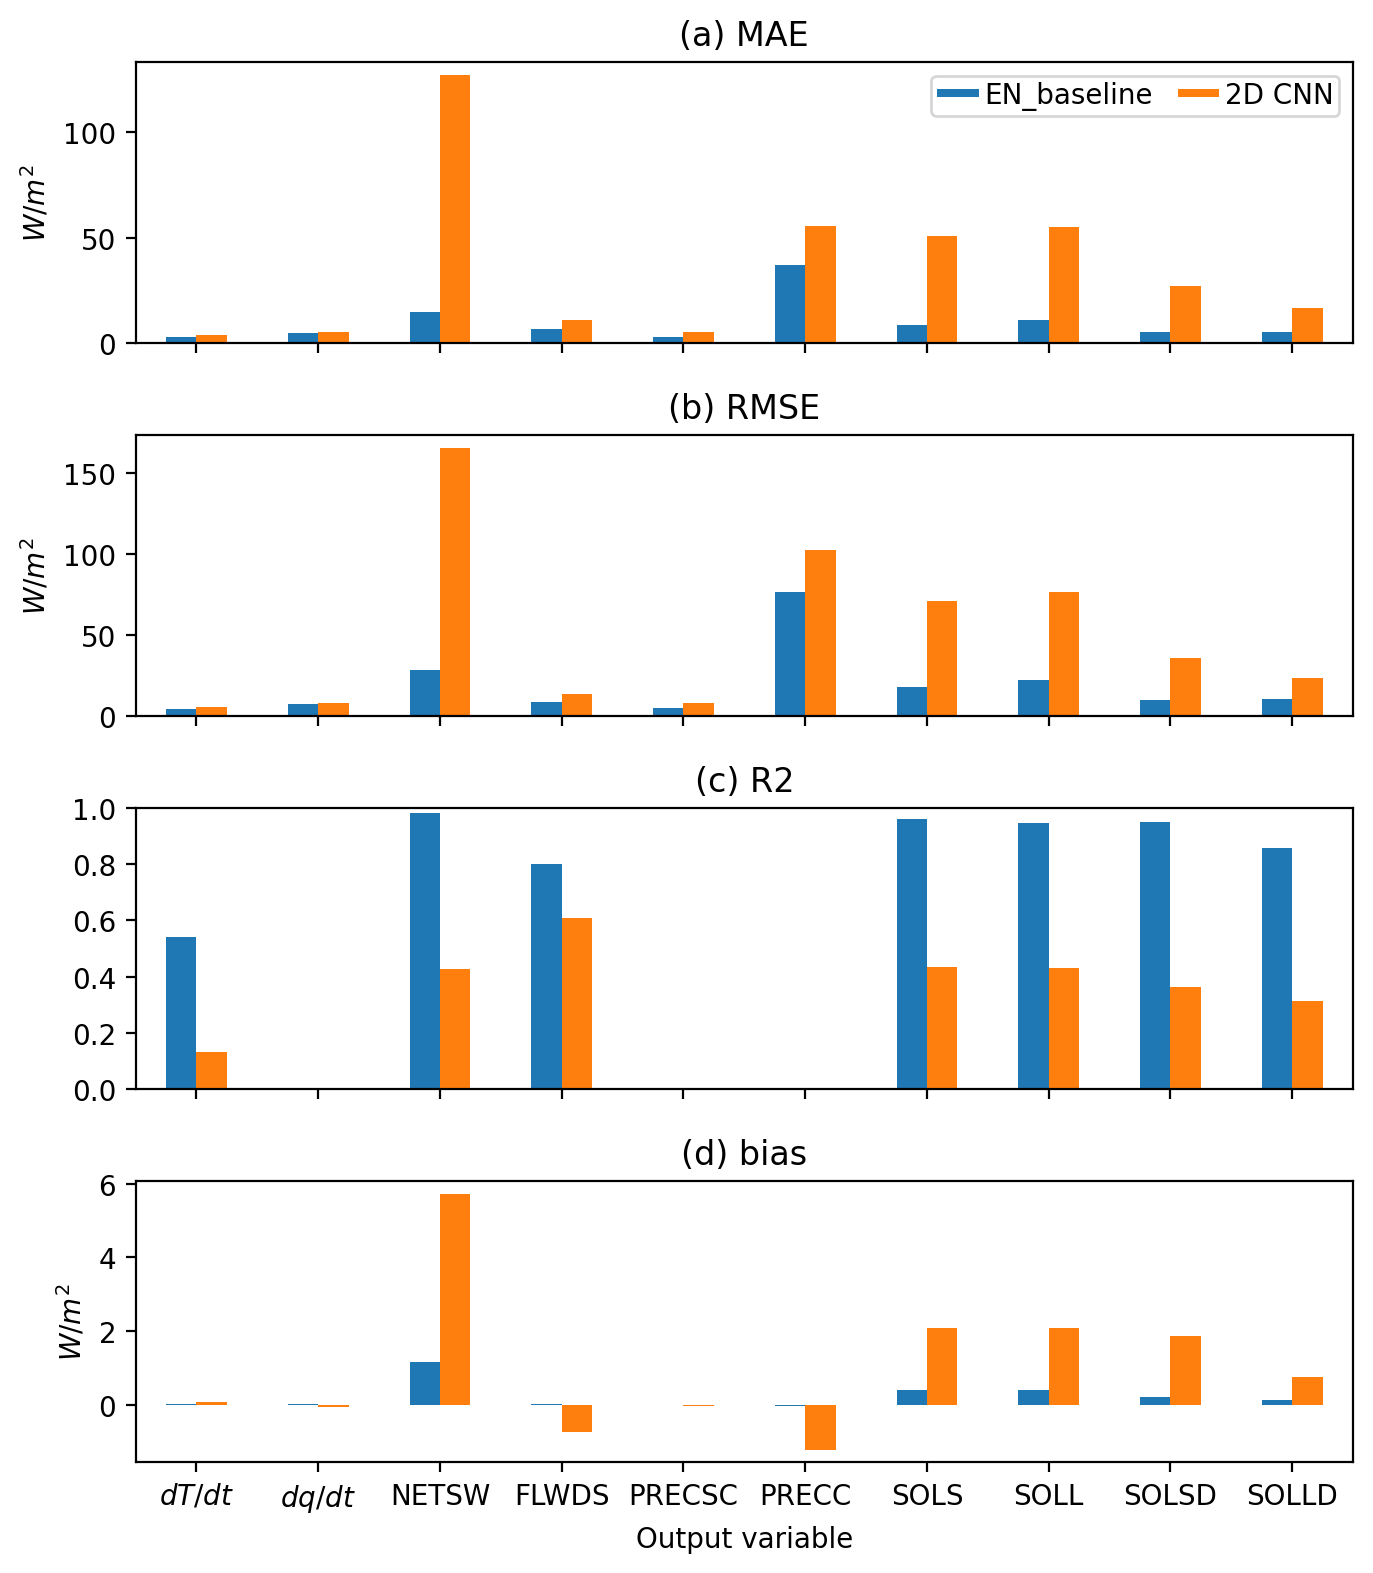

In [ ]:
# set plotting settings
%config InlineBackend.figure_format = 'retina'
letters = string.ascii_lowercase

# create custom dictionary for plotting
dict_var = data.metrics_var_val
plot_df_byvar = {}
for metric in data.metrics_names:
    plot_df_byvar[metric] = pd.DataFrame([dict_var[model][metric] for model in data.model_names],
                                               index=data.model_names)
    plot_df_byvar[metric] = plot_df_byvar[metric].rename(columns = data.var_short_names).transpose()

# plot figure
fig, axes = plt.subplots(nrows  = len(data.metrics_names), sharex = True)
for i in range(len(data.metrics_names)):
    plot_df_byvar[data.metrics_names[i]].plot.bar(
        legend = False,
        ax = axes[i])
    if data.metrics_names[i] != 'R2':
        axes[i].set_ylabel('$W/m^2$')
    else:
        axes[i].set_ylim(0,1)

    axes[i].set_title(f'({letters[i]}) {data.metrics_names[i]}')
axes[i].set_xlabel('Output variable')
axes[i].set_xticklabels(plot_df_byvar[data.metrics_names[i]].index, \
    rotation=0, ha='center')

axes[0].legend(columnspacing = .9,
               labelspacing = .3,
               handleheight = .07,
               handlelength = 1.5,
               handletextpad = .2,
               borderpad = .2,
               ncol = 3,
               loc = 'upper right')
fig.set_size_inches(7,8)
fig.tight_layout()

If you trained models with different hyperparameters, use the ones that performed the best on validation data for evaluation on scoring data.

## Evaluate on scoring data

#### Do this at the VERY END (when you have finished tuned the hyperparameters for your  model and are seeking a final evaluation)

### Load scoring data

In [ ]:
!pwd

/content/ClimSim


In [ ]:
scoring_input_path = "/content/drive/MyDrive/Project3_data/scoring_input.npy"
scoring_target_path = "/content/drive/MyDrive/Project3_data/scoring_target.npy"

# path to target input
data.input_scoring = np.load(scoring_input_path)

# path to target output
data.target_scoring = np.load(scoring_target_path)

### Set pressure grid

In [ ]:
data.set_pressure_grid(data_split = 'scoring')

### Load predictions

In [ ]:
# constant prediction
const_pred_scoring = np.repeat(const_model[np.newaxis, :], data.target_scoring.shape[0], axis = 0)
print(const_pred_scoring.shape)

# multiple linear regression
X_scoring = data.input_scoring
bias_vector_scoring = np.ones((X_scoring.shape[0], 1))
X_scoring = np.concatenate((X_scoring, bias_vector_scoring), axis=1)
mlr_pred_scoring = X_scoring@mlr_weights
print(mlr_pred_scoring.shape)

# Your model prediction here
# Encoder Decoder baseline model
EN_baseline_pred_scoring = EN_baseline_model.predict(data.input_scoring)
print(EN_baseline_pred_scoring.shape)

input_scoring_reshaped = data.input_scoring.reshape(-1, 124)
CNN_pred_scoring = model.predict(input_scoring_reshaped) #CNN_model
print(CNN_pred_scoring.shape)

# Load predictions into object
                    #'const', 'mlr',
data.model_names = [ 'const', 'mlr', 'EN_baseline', '2D CNN'] # add names of your models here
preds = [const_pred_scoring, mlr_pred_scoring, EN_baseline_pred_scoring, CNN_pred_scoring]
data.preds_scoring = dict(zip(data.model_names, preds))

(1681920, 128)
(1681920, 128)
52560/52560 [==============================] - 105s 2ms/step
(1681920, 128)
52560/52560 [==============================] - 87s 2ms/step
(1681920, 128)


### Weight predictions and target

1. Undo output scaling

2.  Weight vertical levels by dp/g

3. Weight horizontal area of each grid cell by a[x]/mean(a[x])

4. Convert units to a common energy unit

In [ ]:
# weight predictions and target
data.reweight_target(data_split = 'scoring')
data.reweight_preds(data_split = 'scoring')

# set and calculate metrics
data.metrics_names = ['MAE', 'RMSE', 'R2', 'bias']
data.create_metrics_df(data_split = 'scoring')

/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: invalid value encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: invalid value encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered in divide
  r_squared = 1 - sq_diff.sum(axis = 0)/tss_time.sum(axis = 0) # sum over time
/content/ClimSim/climsim_utils/data_utils.py:705: RuntimeWarning: divide by zero encountered

### Create plots

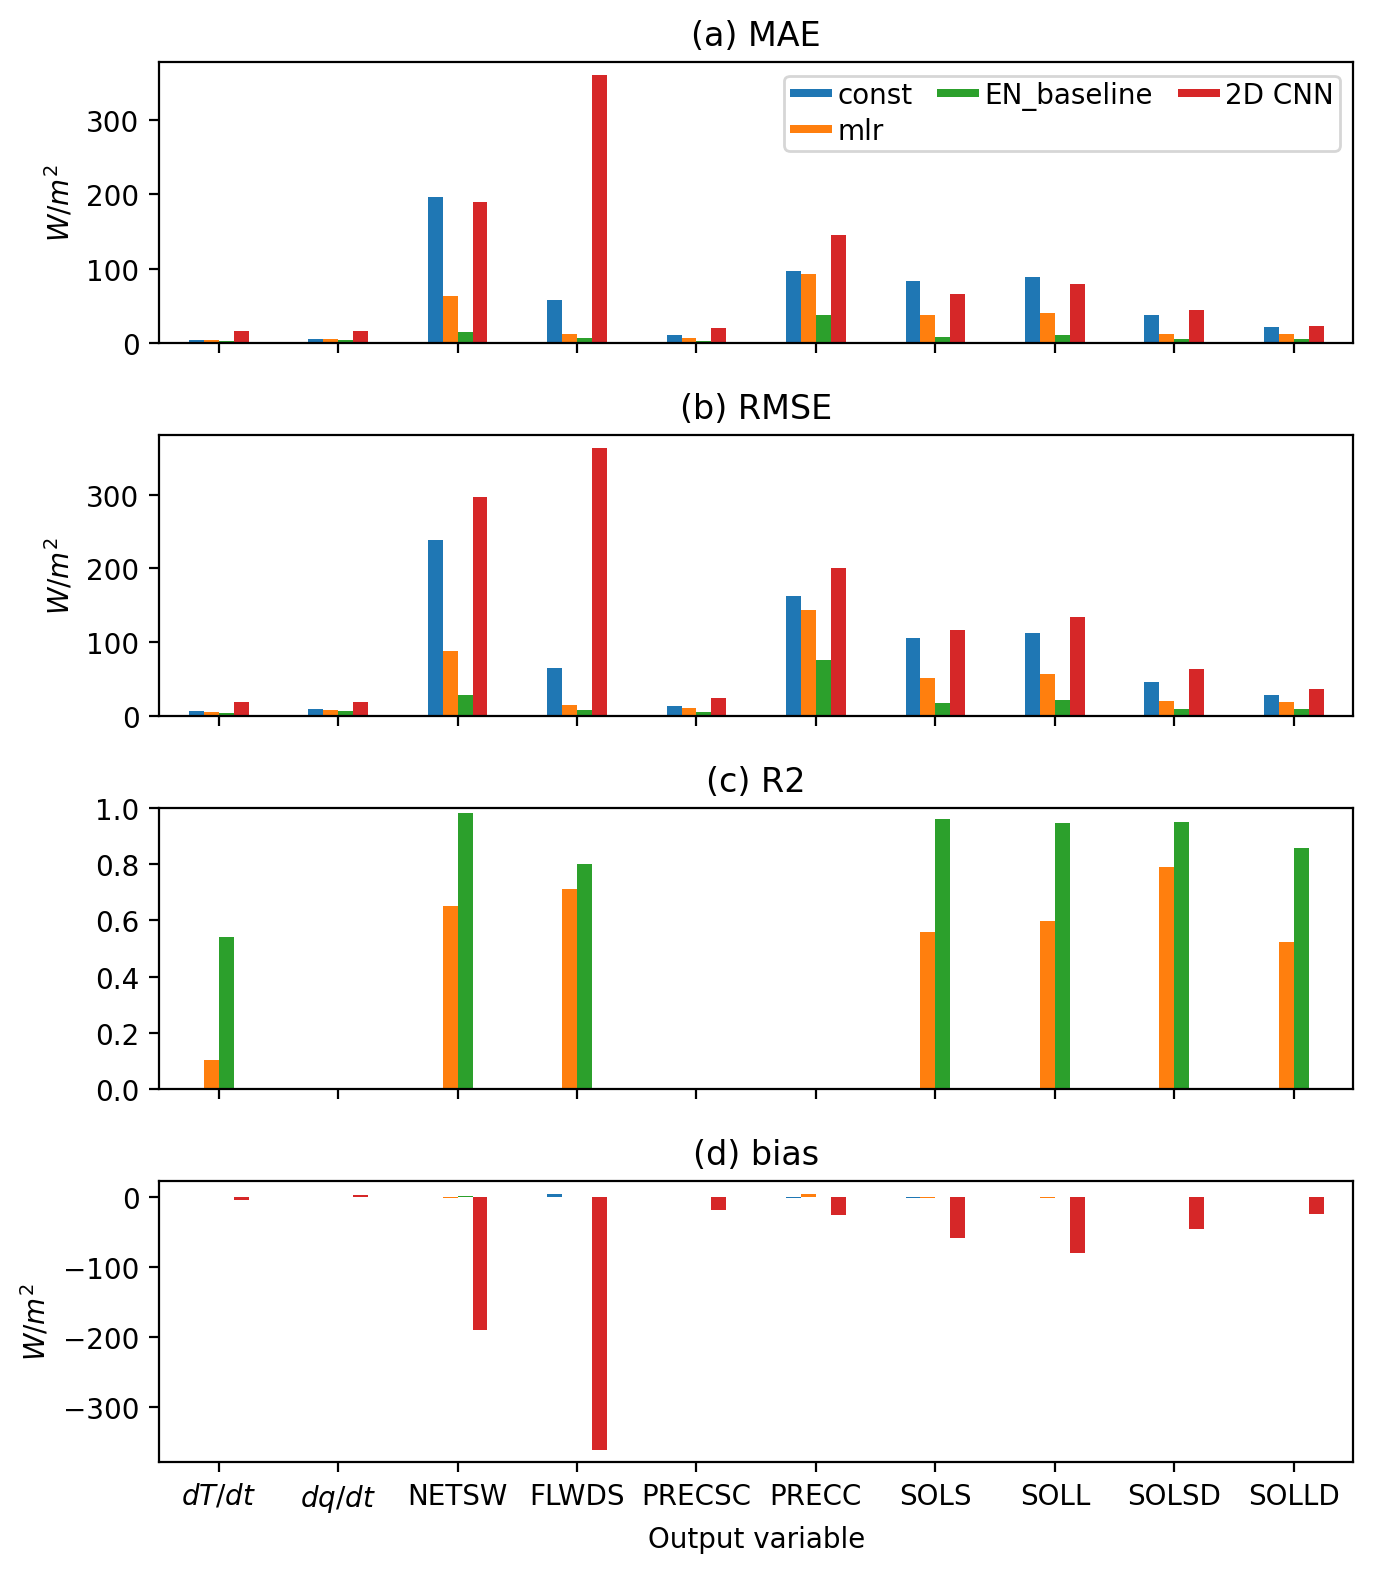

In [ ]:
# set plotting settings
%config InlineBackend.figure_format = 'retina'
letters = string.ascii_lowercase

# create custom dictionary for plotting
dict_var = data.metrics_var_scoring
plot_df_byvar = {}
for metric in data.metrics_names:
    plot_df_byvar[metric] = pd.DataFrame([dict_var[model][metric] for model in data.model_names],
                                               index=data.model_names)
    plot_df_byvar[metric] = plot_df_byvar[metric].rename(columns = data.var_short_names).transpose()

# plot figure
fig, axes = plt.subplots(nrows  = len(data.metrics_names), sharex = True)
for i in range(len(data.metrics_names)):
    plot_df_byvar[data.metrics_names[i]].plot.bar(
        legend = False,
        ax = axes[i])
    if data.metrics_names[i] != 'R2':
        axes[i].set_ylabel('$W/m^2$')
    else:
        axes[i].set_ylim(0,1)

    axes[i].set_title(f'({letters[i]}) {data.metrics_names[i]}')
axes[i].set_xlabel('Output variable')
axes[i].set_xticklabels(plot_df_byvar[data.metrics_names[i]].index, \
    rotation=0, ha='center')

axes[0].legend(columnspacing = .9,
               labelspacing = .3,
               handleheight = .07,
               handlelength = 1.5,
               handletextpad = .2,
               borderpad = .2,
               ncol = 3,
               loc = 'upper right')
fig.set_size_inches(7,8)
fig.tight_layout()

# lower MAE, RMSE should be better
# higer R^2 should be better
# Bias loser to 0 should be better

**Conclusion:** The baseline is better because it has an accuracy of 0.98, which is so high that none of the models applied can surpass it. However, among the models used, the 2D CNN is the best one